# 03 - Interactive Viz

## Deadline

Wednesday November 8th, 2017 at 11:59PM

## Important Notes

- Make sure you push on GitHub your Notebook with all the cells already evaluated
- Note that maps do not render in a standard Github environment : you should export them to HTML and link them in your notebook.
- Remember that `.csv` is not the only data format. Though they might require additional processing, some formats provide better encoding support.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you plan to implement!
- Please write all your comments in English, and use meaningful variable names in your code

## Background

In this homework we will be exploring interactive visualization, which is a key ingredient of many successful data visualizations (especially when it comes to infographics).

Unemployment rates are major economic metrics and a matter of concern for governments around the world. Though its definition may seem straightforward at first glance (usually defined as the number of unemployed people divided by the active population), it can be tricky to define consistently. For example, one must define what exactly unemployed means : looking for a job ? Having declared their unemployment ? Currently without a job ? Should students or recent graduates be included ? We could also wonder what the active population is : everyone in an age category (e.g. `16-64`) ? Anyone interested by finding a job ? Though these questions may seem subtle, they can have a large impact on the interpretation of the results : `3%` unemployment doesn't mean much if we don't know who is included in this percentage. 

In this homework you will be dealing with two different datasets from the statistics offices of the European commission ([eurostat](http://ec.europa.eu/eurostat/data/database)) and the Swiss Confederation ([amstat](https://www.amstat.ch)). They provide a variety of datasets with plenty of information on many different statistics and demographics at their respective scales. Unfortunately, as is often the case is data analysis, these websites are not always straightforward to navigate. They may include a lot of obscure categories, not always be translated into your native language, have strange link structures, … Navigating this complexity is part of a data scientists' job : you will have to use a few tricks to get the right data for this homework.

For the visualization part, install [Folium](https://github.com/python-visualization/folium) (*HINT*: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!). Folium's `README` comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find two `.topojson` files, containing the geo-coordinates of 

- European countries (*liberal definition of EU*) (`topojson/europe.topojson.json`, [source](https://github.com/leakyMirror/map-of-europe))
- Swiss cantons (`topojson/ch-cantons.topojson.json`) 

These will be used as an overlay on the Folium maps.

## Assignment

1. Go to the [eurostat](http://ec.europa.eu/eurostat/data/database) website and try to find a dataset that includes the european unemployment rates at a recent date.

   Use this data to build a [Choropleth map](https://en.wikipedia.org/wiki/Choropleth_map) which shows the unemployment rate in Europe at a country level. Think about [the colors you use](https://carto.com/academy/courses/intermediate-design/choose-colors-1/), how you decided to [split the intervals into data classes](http://gisgeography.com/choropleth-maps-data-classification/) or which interactions you could add in order to make the visualization intuitive and expressive. Compare Switzerland's unemployment rate to that of the rest of Europe.

2. Go to the [amstat](https://www.amstat.ch) website to find a dataset that includes the unemployment rates in Switzerland at a recent date.

   > *HINT* Go to the `details` tab to find the raw data you need. If you do not speak French, German or Italian, think of using free translation services to navigate your way through. 

   Use this data to build another Choropleth map, this time showing the unemployment rate at the level of swiss cantons. Again, try to make the map as expressive as possible, and comment on the trends you observe.

   The Swiss Confederation defines the rates you have just plotted as the number of people looking for a job divided by the size of the active population (scaled by 100). This is surely a valid choice, but as we discussed one could argue for a different categorization.

   Copy the map you have just created, but this time don't count in your statistics people who already have a job and are looking for a new one. How do your observations change ? You can repeat this with different choices of categories to see how selecting different metrics can lead to different interpretations of the same data.

3. Use the [amstat](https://www.amstat.ch) website again to find a dataset that includes the unemployment rates in Switzerland at recent date, this time making a distinction between *Swiss* and *foreign* workers.

   The Economic Secretary (SECO) releases [a monthly report](https://www.seco.admin.ch/seco/fr/home/Arbeit/Arbeitslosenversicherung/arbeitslosenzahlen.html) on the state of the employment market. In the latest report (September 2017), it is noted that there is a discrepancy between the unemployment rates for *foreign* (`5.1%`) and *Swiss* (`2.2%`) workers. 

   Show the difference in unemployment rates between the two categories in each canton on a Choropleth map (*hint* The easy way is to show two separate maps, but can you think of something better ?). Where are the differences most visible ? Why do you think that is ?

   Now let's refine the analysis by adding the differences between age groups. As you may have guessed it is nearly impossible to plot so many variables on a map. Make a bar plot, which is a better suited visualization tool for this type of multivariate data.

4. *BONUS*: using the map you have just built, and the geographical information contained in it, could you give a *rough estimate* of the difference in unemployment rates between the areas divided by the [Röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben)?

### Imports, functions

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import json
import folium
import matplotlib.pyplot as plt

# Makes a folium color map
def make_folium_map(json_map_path, object_path,  color_func, vmin, vmax, colors_table,location, zoom_start, legend_name  ):

    cantons_path = os.path.join('', json_map_path)

    topo_json_data = json.load(open(cantons_path))
    m = folium.Map(location=location, zoom_start=zoom_start)
    folium.TopoJson(
        topo_json_data, 
        object_path=object_path,
        style_function=lambda feature: {
            'fillColor': color_func(feature['id']),
            'fillOpacity': 0.9,
            'line_opacity':0.3,
            'weight': 0.4,

            }
        ).add_to(m)
    linear = folium.colormap.StepColormap( colors=colors_table, vmin=vmin, vmax=vmax,  caption=legend_name).add_to(m)

    return m;

## Europe
### Load the Europe Unemployment Data
The Data is from  eurostat from Q2 2017, showing countries and unemployment rate in csv format.
1. Load the data.
2. Keep only 2017Q2 rate (the newest one)
3. Keep only TOTAL (exclude sex)
4. Delete the staticts for European union as a whole (first 6 rows)

In [2]:
ue_df = pd.read_csv('hw3_data/lfsq_urgan_1_Data.csv', header = 0)

# keep only 2017Q2 rate (the newest one)
# keep only TOTAL (exclude sex)
# KEEP only GEO and VALUE information
# delete the staticts for European union as a whole (first 6)
ue_df = ue_df[ue_df['TIME'] == '2017Q2' ][ue_df['SEX'] == 'Total' ][['GEO', 'Value']][6:]

ue_df.head()

/Users/patryk/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,GEO,Value
1071,Belgium,7.0
1074,Bulgaria,6.3
1077,Czech Republic,3.0
1080,Denmark,5.5
1083,Germany (until 1990 former territory of the FRG),3.8


### Clean the data
- Add ISO2 country codes manually
- Add missing country codes as Nan values (needed for the map)

In [3]:
# adding ISO2 country codes 
ue_df['COUNTRY_CODE'] = ['BE', 'BG', 'CZ', 'DK', 'DE', 'EE', 'IE', 'GR', 'ES', 'FR', 'HR', 'IT', 'CY', 'LV', 'LT', 'LU', 'HU', 'MT', 'NL', 'AT', 'PL', 'PT' , 'RO', 'SI', 'SK', 'FI', 'SE', 'GB', 'IS', 'NO', 'CH', 'MK', 'TR']

# now we need to add missing country codes 
values_undefined = ['AZ','AL','AM','BA','GE','IL','BY','LI','FO','AD','MC','ME','MD','UA','SM','RS','VA','RU']
for name_val in values_undefined:
    ue_df = ue_df.append( {'GEO':name_val, 'Value': np.NaN, 'COUNTRY_CODE':name_val}, ignore_index = True)

ue_df.head()

,GEO,Value,COUNTRY_CODE
0,Belgium,7.0,BE
1,Bulgaria,6.3,BG
2,Czech Republic,3.0,CZ
3,Denmark,5.5,DK
4,Germany (until 1990 former territory of the FRG),3.8,DE


### Exploratory Data Analysis
Plot bar plot to Compare different european counntries with Switzerland.

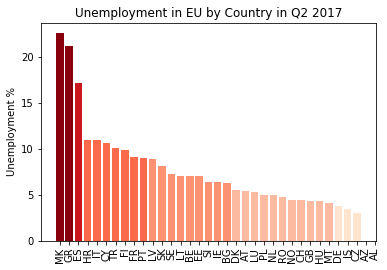

In [4]:
sorted_df = ue_df.copy()#pd.DataFrame( ue_df['Values','COUNTRY_CODE'] );
sorted_df.sort_values(['Value'], ascending = False, inplace=True)

colors_eu = ['#ffe5d0', '#fcbba1', '#fc9272', '#fb6a4a', '#ef3b2c', '#cb181d', '#a50f15', '#89000d']
thresh_eu = [4.0      , 6.0      , 9.0      , 13.0     , 16.0     , 19.0     , 21.0     , 24]

def unemployment_colors_eu(state):
    """Maps Unemplpoyment value with colors."""
    val = sorted_df[sorted_df['COUNTRY_CODE'] == state]['Value']
    val = np.squeeze(val)
    if np.isnan(val):
        return '#bdbdbd'
    length = len(colors_eu)
    for i in range(0, length-1):
        if val < thresh_eu[i]:
            return colors_eu[i]
    return  colors_eu[length-1]

plt.figure(1)
sorted_df.sort_values(['Value'], ascending = False, inplace=True)
values = sorted_df['Value'].values
length = len(values)
names = sorted_df['COUNTRY_CODE'].values
plt.bar(range(0,length), values)
plt.xticks(range(0,length), names, rotation=90)
for i in range(0, length):
    nm = np.squeeze(sorted_df[sorted_df['COUNTRY_CODE'] == names[i]]['COUNTRY_CODE']);
    color = unemployment_colors_eu(nm)
    plt.bar(i,values[i], color=color)
plt.ylabel('Unemployment %')
plt.title('Unemployment in EU by Country in Q2 2017')
plt.show()  

#### Switzerland in comparison with other countires
Swiss unemployment is very low -~5%, it is on the top 7 european countries. 

### Choropleth Map of Europe Unemployment

--> to see the map, go to <a href="hw3_data/map_europe_unemployment.html">map_europe_unemployment.html</a>

In [5]:
m = make_folium_map('hw3_data/europe2.topojson.json', 'objects.europe',
                    unemployment_colors_eu, 4.0, 21.0, colors_eu, 
                    [56,10], 3.5, '% Europe Unemployment in Q2 2017')

m.save('hw3_data/map_europe_unemployment.html')

m

### Comments:
1. We could observe that Macedonia and Greece, the countries with crisis, have big unemploymentm (as well as Spain).
2. Countires like Germany or Swiztewlrnad, with a lot of money and stable economy, have very low unemployment.
3. ??? ADD YOUR COMMENTS HERE

---
## Switzerland
### Load and clean the Swiss data from amstat
1. Downloaded the data as excel - Arbeitslosen- und Jugendarbeitslosenquote nach verschiedenen Kriterien.xlsx
2. Delete unnecessary columns
3. Add the canton code manually

In [6]:
swiss_df = pd.read_excel('hw3_data/Arbeitslosen- und Jugendarbeitslosenquote nach verschiedenen Kriterien.xlsx',skiprows=3)
swiss_df.columns = ['Canton','Na','Unemployment rate', 'Unemployed people']
swiss_df = swiss_df[['Canton','Unemployment rate']]
swiss_df['CODE'] = ['ZH','BE','LU','UR','SZ','OW','NW','GL','ZG','FR','SO','BS','BL','SH','AR','AI','SG','GR','AG','TG','TI','VD','VS','NE','GE','JU']     
swiss_df.head()

,Canton,Unemployment rate,CODE
0,Zürich,3.3,ZH
1,Bern,2.4,BE
2,Luzern,1.7,LU
3,Uri,0.6,UR
4,Schwyz,1.7,SZ


### Explore the Data
1. Assign colors to classes.
2. show barplot to see the distrubution of unemployment per canton.

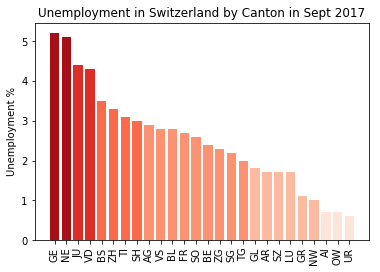

In [7]:
colors_swiss = ['#fee5d9', '#fcbba1', '#fc9272', '#fb6a4a', '#de2d26', '#a50f15']
thresh_swiss = [1.0      , 2.0      , 3.0      , 4.0      , 5.0      , 6.0     , 7, 8]

def unemployment_colors_swiss(state):
    """Maps Unemplpoyment value with colors."""
    val = swiss_df[swiss_df['CODE'] == state]['Unemployment rate']
    val = np.squeeze(val)
    length = len(colors_swiss)
    for i in range(0, length-1):
        if val < thresh_swiss[i]:
            return colors_swiss[i]
    return  colors_swiss[length-1]

plt.figure(1)
swiss_df.sort_values(['Unemployment rate'], ascending = False, inplace=True)
values = swiss_df['Unemployment rate'].values
length = len(values)
names = swiss_df['CODE'].values
plt.bar(range(0,length), values)
plt.bar(3,values[3], color='purple') # set CH to purple
plt.xticks(range(0,length), names, rotation=90)
for i in range(0, length):
    nm = np.squeeze(swiss_df[swiss_df['CODE'] == names[i]]['CODE']);
    color = unemployment_colors_swiss(nm)
    plt.bar(i,values[i], color=unemployment_colors_swiss(nm))
plt.ylabel('Unemployment %')
plt.title('Unemployment in Switzerland by Canton in Sept 2017')
plt.show()

### Choropleth Map of Swiss Unemployment

--> to see the map, go to <a href="hw3_data/map_swiss_unemployment.html">map_swiss_unemployment.html</a>

In [8]:
m = make_folium_map('hw3_data/ch-cantons_topo.json', 'objects.cantons',
                    unemployment_colors_swiss, 0.0, 6.0, colors_swiss,[46.9,8], 8, '% Swiss Unemployment in Sept 2017')

m.save('hw3_data/map_swiss_unemployment.html')

m

### Comments
1. We can observe, that the cantons close to the French border have significantly bigger unemployment.
2. Cantons in the middle have very small unemployment.
3. ???? ADD YOUR COMMENETS HERE

### Load another data from amstat, to create modified unemployment rate
The new data conatain 2 values, the unemployment people and the job seekers. We define the new unemploym ent ratio as 
job seekers - unemployment people / population. The population is computed from the previous dataframe.

In [9]:
swiss_df2 = pd.read_excel('hw3_data/1_3 Arbeitslose nach Berufsgruppen_ Geschlecht und Kantonen.xlsx',skiprows=3)
swiss_df2.columns = ['Canton','Na','Unemployment People', 'Job seekers']
swiss_df2 = swiss_df2[['Canton','Unemployment People', 'Job seekers']]
swiss_df2['CODE'] = ['ZH','BE','LU','UR','SZ','OW','NW','GL','ZG','FR','SO','BS','BL','SH','AR','AI','SG','GR','AG','TG','TI','VD','VS','NE','GE','JU']     
swiss_df2['Population'] = np.floor(swiss_df2['Unemployment People'] *100 / swiss_df['Unemployment rate'])
swiss_df2['New Unemployed Ratio'] = ( swiss_df2['Job seekers'] -swiss_df2['Unemployment People'] )*100 / swiss_df2['Population']
swiss_df2.head()

,Canton,Unemployment People,Job seekers,CODE,Population,New Unemployed Ratio
0,Zürich,27225,34156,ZH,825000.0,0.840121
1,Bern,13658,18385,BE,569083.0,0.830635
2,Luzern,3885,6756,LU,228529.0,1.256296
3,Uri,112,257,UR,18666.0,0.776813
4,Schwyz,1455,2229,SZ,85588.0,0.904332


### Explore the modified unemployment data
1. Assign new colors to classes.
2. show barplot to see the distrubution of modified unemployment per canton.

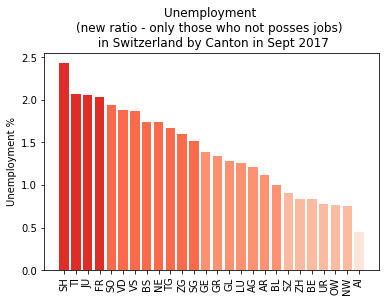

In [10]:
colors_swiss2 = ['#fee5d9', '#fcbba1', '#fc9272', '#fb6a4a', '#de2d26']
thresh_swiss2 = [0.5      , 1.0      , 1.5      , 2.0      , 2.5      , 3.0     , 3.5]

def unemployment_colors_swiss2(state):
    """Maps Unemplpoyment value with colors."""
    val = swiss_df2[swiss_df2['CODE'] == state]['New Unemployed Ratio']
    val = np.squeeze(val)
    length = len(colors_swiss2)
    for i in range(0, length-1):
        if val < thresh_swiss2[i]:
            return colors_swiss2[i]
    return  colors_swiss2[length-1]

plt.figure(1)
swiss_df2.sort_values(['New Unemployed Ratio'], ascending = False, inplace=True)
values = swiss_df2['New Unemployed Ratio'].values
length = len(values)
names = swiss_df2['CODE'].values
plt.bar(range(0,length), values)
plt.bar(3,values[3], color='purple') # set CH to purple
plt.xticks(range(0,length), names, rotation=90)
for i in range(0, length):
    nm = np.squeeze(swiss_df2[swiss_df2['CODE'] == names[i]]['CODE']);
    color = unemployment_colors_swiss2(nm)
    plt.bar(i,values[i], color=color)
plt.ylabel('Unemployment %')
plt.title('Unemployment \n(new ratio - only those who not posses jobs) \n in Switzerland by Canton in Sept 2017')
plt.show()

### Choropleth Map of Modified Swiss Unemployment

--> to see the map, go to <a href="hw3_data/map_swiss_unemployment2.html">map_swiss_unemployment2.html</a>

In [11]:
m = make_folium_map('hw3_data/ch-cantons_topo.json', 'objects.cantons',
                    unemployment_colors_swiss2, 0.0, 2.5, colors_swiss2,[46.9,8], 8, '% Swiss Unemployment (new ratio) in Sept 2017')
m.save('hw3_data/map_swiss_unemployment2.html')

m

### Comments
1. This modified unemployment shows how many "real" unemployed people are in siwzterland (people that don't have a job, not the ones that are looking for a new one).
2. As expected, Ticcino is high, close to Italy, where they have similar problems.
3. In general all Non-German speaking cantons are high
4. ??? ADD YOUR COMMENTS HERE

### Load another data from amstat, to analyse foerign people in CH unemployment
The new data conatain number of foerigners/swiss people, from which we can see what is the percantage of foreginers in the whole unemployment. 

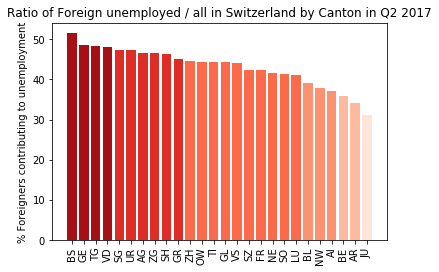

In [12]:
swiss_df3 = pd.read_excel('hw3_data/1_2 Arbeitslose und Stellensuchende nach geografischen Merkmalen.xlsx',skiprows=3)
swiss_df3.columns = ['Canton','Nationality','Na','Unemployment People']
swiss_df3 = swiss_df3[['Canton','Nationality','Unemployment People']]
#swiss_df3['CODE'] = ['ZH','BE','LU','UR','SZ','OW','NW','GL','ZG','FR','SO','BS','BL','SH','AR','AI','SG','GR','AG','TG','TI','VD','VS','NE','GE','JU']     

all_unemployed = swiss_df3.query('Nationality=="Gesamt"')[['Canton','Unemployment People']]

foreign_unemployed = swiss_df3.query('Nationality=="Ausländer"')[['Canton','Unemployment People']]
all_unemployed.reset_index(inplace=True)
foreign_unemployed.reset_index(inplace=True)

all_unemployed['Foreign Unemployed Perc'] = foreign_unemployed['Unemployment People'] *100 / all_unemployed['Unemployment People']
all_unemployed['CODE'] = ['ZH','BE','LU','UR','SZ','OW','NW','GL','ZG','FR','SO','BS','BL','SH','AR','AI','SG','GR','AG','TG','TI','VD','VS','NE','GE','JU']     

colors_swiss3 = ['#fee5d9', '#fcbba1', '#fc9272', '#fb6a4a', '#de2d26', '#a50f15']
thresh_swiss3 = [33       , 37       , 40       , 45       , 48       , 52       , 53, 60]

def unemployment_colors_swiss3(state):
    """Maps Unemplpoyment value with colors."""
    val = all_unemployed[all_unemployed['CODE'] == state]['Foreign Unemployed Perc']
    val = np.squeeze(val)
    length = len(colors_swiss3)
    for i in range(0, length-1):
        if val < thresh_swiss3[i]:
            return colors_swiss3[i]
    return  colors_swiss3[length-1]

plt.figure(1)
all_unemployed.sort_values(['Foreign Unemployed Perc'], ascending = False, inplace=True)
values = all_unemployed['Foreign Unemployed Perc'].values
length = len(values)
names = all_unemployed['CODE'].values
plt.bar(range(0,length), values)
plt.xticks(range(0,length), names, rotation=90)
for i in range(0, length):
    nm = np.squeeze(all_unemployed[all_unemployed['CODE'] == names[i]]['CODE']);
    color = unemployment_colors_swiss3(nm)
    plt.bar(i,values[i], color=color)
plt.ylabel('% Foreigners contributing to unemployment')
plt.title('Ratio of Foreign unemployed / all in Switzerland by Canton in Q2 2017')
plt.show()


### Choropleth Map of Foreign Swiss Unemployment

--> to see the map, go to <a href="hw3_data/map_swiss_foreign_unemployment.html">map_swiss_foreign_unemployment.html</a>

In [13]:
m = make_folium_map('hw3_data/ch-cantons_topo.json', 'objects.cantons',
                    unemployment_colors_swiss3, 33.0, 52, colors_swiss3,[46.9,8], 8, '% Foreigners contributing to unemployment in CH in Sept 2017')
m.save('hw3_data/map_swiss_foreign_unemployment.html')

m

### Comments
1. Cantons that have borders with outside --> more foreigners working there --> they contribute more to the unemployment.
2. ??? ADD YOUR COMMENTS HERE

### Analysing Age in Unemployment
1. Combine all the above data in 1 dataframe.
2. Add age info from amstat

In [14]:
all_unemployed2 = all_unemployed[['Canton','Foreign Unemployed Perc', 'CODE']].copy()
#swiss_df2.reset_index(inplace=True)
all_unemployed2.set_index('CODE', inplace=True)
new_unemp = swiss_df2[['Canton','CODE','New Unemployed Ratio']].copy()
new_unemp.reset_index(inplace=True)
new_unemp = new_unemp[['Canton','CODE','New Unemployed Ratio']]
new_unemp.set_index('CODE', inplace=True)
all_data = all_unemployed2.copy()
swiss_df.set_index('CODE', inplace=True)
all_data['Unemployment Rate Only WT job'] = new_unemp['New Unemployed Ratio']
all_data['Regular Unemployment Rate'] = swiss_df[['Unemployment rate']]
all_data['Foreign Unemployed Rate'] = all_data['Foreign Unemployed Perc']/100
all_data = all_data[['Canton','Regular Unemployment Rate','Unemployment Rate Only WT job','Foreign Unemployed Rate']]
all_data.head()

,Canton,Regular Unemployment Rate,Unemployment Rate Only WT job,Foreign Unemployed Rate
CODE,,,,
BS,Basel-Stadt,3.5,1.735316,0.515195
GE,Genf,5.2,1.386923,0.485696
TG,Thurgau,2.0,1.674297,0.482341
VD,Waadt,4.3,1.878417,0.481725
SG,St. Gallen,2.2,1.521005,0.473641


In [15]:
swiss_df4 = pd.read_excel('hw3_data/1_2 Arbeitslose und Stellensuchende nach geografischen Merkmalen (1).xlsx',skiprows=3)
swiss_df4.columns = ['Canton','Age cat','Age cat name','Na','Unemployed People','Registered Jobsekers']
swiss_df4 = swiss_df4[['Canton','Age cat','Age cat name','Unemployed People','Registered Jobsekers']]

### Make Bar plot showing unemployment age distribution in cantons

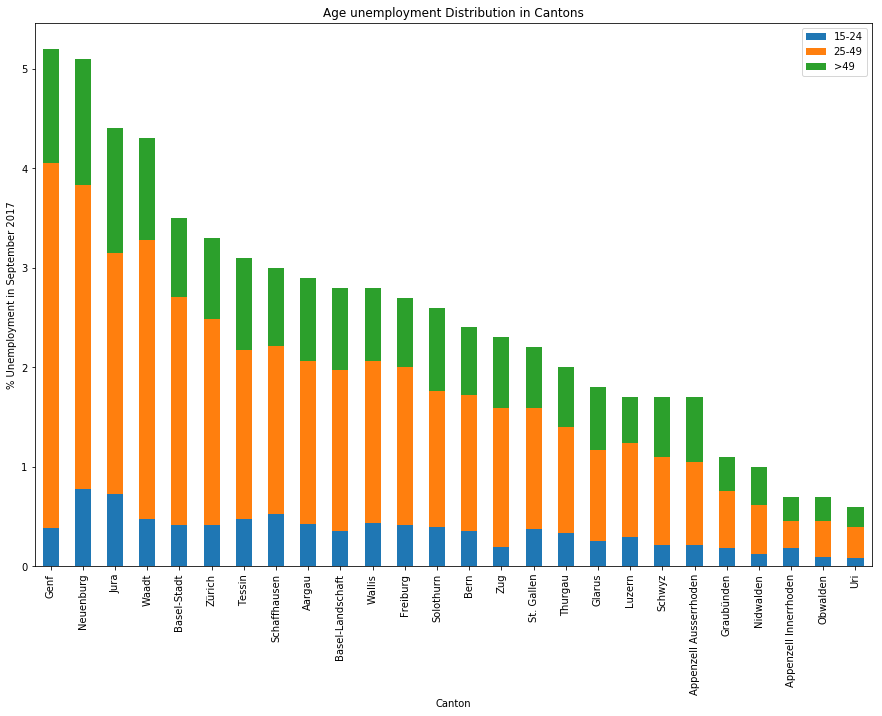

In [16]:
swiss_age_data = pd.DataFrame(columns=['Canton','15-24', '25-49','>49','sum'])
canton_names_nodupl = list(set(swiss_df4['Canton'].values))
canton_names_nodupl.remove('Gesamt')


for canton_name in canton_names_nodupl:
    multiplier = all_data[all_data['Canton'] == canton_name]['Regular Unemployment Rate'].values[0]
    val_15 = swiss_df4[swiss_df4['Canton']==canton_name]
    val_15 = val_15[val_15['Age cat']=='1']['Unemployed People'].values[0] / val_15[val_15['Age cat']=='Gesamt']['Unemployed People'].values[0]
    val_15 *=multiplier
    val_25 = swiss_df4[swiss_df4['Canton']==canton_name]
    val_25 = val_25[val_25['Age cat']=='2']['Unemployed People'].values[0] / val_25[val_25['Age cat']=='Gesamt']['Unemployed People'].values[0]
    val_25 *=multiplier
    val_49 = swiss_df4[swiss_df4['Canton']==canton_name]
    val_49 = val_49[val_49['Age cat']=='3']['Unemployed People'].values[0] / val_49[val_49['Age cat']=='Gesamt']['Unemployed People'].values[0]
    val_49 *=multiplier
    df = pd.DataFrame([[canton_name,val_15, val_25, val_49, multiplier]], columns=list(['Canton','15-24', '25-49','>49','sum' ]))
    swiss_age_data = pd.concat([swiss_age_data, df],ignore_index=True)
swiss_age_data.sort_values('sum', ascending = False, inplace=True)
swiss_age_data = swiss_age_data[['Canton','15-24', '25-49','>49']]
swiss_age_data.set_index('Canton', inplace=True)
plt.rcParams['figure.figsize'] = (15,10)
plt.figure(figsize=(4, 40))
swiss_age_data.plot.bar(stacked=True)
plt.title('Age unemployment Distribution in Cantons')
plt.ylabel('% Unemployment in September 2017')
plt.show()

### Comments: 
1. We can see, that the main age in unemployment is 25-49
2. ??? ADD COMMENTS HERE

### Bonus - Unemployment difference between Roestigraben
1. Count unemployment and whole population people in FR and GER parts of CH.
2. Compare the 2 numbers. 

In [17]:
fr_codes = ['JU','FR','VD', 'VS', 'NE','GE','BE']
ger_codes = ['BE','TG','AG','SG','AI','AR','SH','BL','BS','SO','ZG','GL','NW','OW','SZ','UR','LU','ZH']

fr_unemp_ppl=0
fr_total_ppl=0
for fr_code in fr_codes:
    fr_unemp_ppl+=swiss_df2[swiss_df2['CODE']==fr_code]['Unemployment People'].values[0]
    fr_total_ppl+=swiss_df2[swiss_df2['CODE']==fr_code]['Population'].values[0]
fr_unemp = fr_unemp_ppl*100/fr_total_ppl
print('Francofonique CH unemployment: ',fr_unemp ,'%')


ger_unemp_ppl=0
ger_total_ppl=0
for ger_code in ger_codes:
    ger_unemp_ppl+=swiss_df2[swiss_df2['CODE']==fr_code]['Unemployment People'].values[0]
    ger_total_ppl+=swiss_df2[swiss_df2['CODE']==fr_code]['Population'].values[0]
ger_unemp = ger_unemp_ppl*100/ger_total_ppl
print('Germanophone CH unemployment: ', ger_unemp,'%')

print('Difference in Roestigraben Unemployment is :  ' , fr_unemp - ger_unemp, '%')



Francofonique CH unemployment:  3.51327340386 %
Germanophone CH unemployment:  2.40000140577 %
Difference in Roestigraben Unemployment is :   1.11327199809 %


### Comments:
1. Only 1% of unemployment is not worth to move there and speak german...